# **Household Power Consumption Analysis**

By: Dhruv Gupta

## Code

In [8]:
install.packages('psych')
install.packages('corrplot')
install.packages("leaps")

library(psych)
library(leaps)
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
df <- read.table("household_power_consumption.txt",sep=";",header=T)

In [10]:
head(df)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17
2,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16
3,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17
4,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17
5,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17
6,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17


In [11]:
colnames(df)

[1] "Date"                  "Time"                  "Global_active_power"  
[4] "Global_reactive_power" "Voltage"               "Global_intensity"     
[7] "Sub_metering_1"        "Sub_metering_2"        "Sub_metering_3"

In [12]:
# Creating Backup Dataset
df1 = df
dim(df1)

[1] 2075259       9

## **DATA CLEANING**

In [13]:
dim(df)

[1] 2075259       9

### Checking for Null Values

In [14]:
sum(is.na(df))

[1] 25979

### Checking how much data is null in the dataset.

In [15]:
percentage = mean(is.na(df)) * 100
percentage

[1] 0.1390937

## As the percentage of null values is very small, we can simply remove the null values from the dataset.

In [16]:
df = na.omit(df)

In [17]:
sum(is.na(df))

[1] 0

## Hence, all the null values have been successfully removed.

### Now we will chek the dataset for duplicate values.

In [18]:
sum(duplicated(df))

[1] 0

### Column DataType Conversion

In [19]:
# Concatenate Date and Time columns
df$DateTime <- paste(as.character(df$Date), as.character(df$Time))

# Optionally, convert the new DateTime column to a proper datetime object
df$DateTime <- as.POSIXct(df$DateTime, format="%d/%m/%Y %H:%M:%S")

In [20]:
# df$DateTime <- paste(df$Date,df$Time)

df$Date <- NULL
df$Time <- NULL

head(df)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dttm>
1,4.216,0.418,234.840,18.400,0.000,1.000,17,2006-12-16 17:24:00
2,5.360,0.436,233.630,23.000,0.000,1.000,16,2006-12-16 17:25:00
3,5.374,0.498,233.290,23.000,0.000,2.000,17,2006-12-16 17:26:00
4,5.388,0.502,233.740,23.000,0.000,1.000,17,2006-12-16 17:27:00
5,3.666,0.528,235.680,15.800,0.000,1.000,17,2006-12-16 17:28:00
6,3.520,0.522,235.020,15.000,0.000,2.000,17,2006-12-16 17:29:00


In [21]:
df <- df[, c(8,1,2,3,4,5,6,7)]

In [22]:
df['Global_active_power']   <- as.numeric(as.character(df$Global_active_power))
df['Global_reactive_power'] <- as.numeric(as.character(df$Global_reactive_power))
df['Voltage']               <- as.numeric(as.character(df$Voltage))
df['Global_intensity']      <- as.numeric(as.character(df$Global_intensity))
df['Sub_metering_1']        <- as.numeric(as.character(df$Sub_metering_1))
df['Sub_metering_2']        <- as.numeric(as.character(df$Sub_metering_2))
df['Sub_metering_3']        <- as.numeric(as.character(df$Sub_metering_3))


In [23]:
head(df)

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0,1,17
2,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0,1,16
3,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0,2,17
4,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0,1,17
5,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0,1,17
6,2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0,2,17


## **Exploratory Data Analysis**

In [24]:
df_mat = data.matrix(df)
describe(df_mat)

,vars,n,mean,sd,median,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DateTime,1,2049280,1.228180e+09,3.578752e+07,1.228008e+09,1.16629e+09,1.290805e+09,1.245155e+08,0.01084491,-1.1902952,2.499948e+04
Global_active_power,2,2049280,1.091615e+00,1.057294e+00,6.020000e-01,7.60000e-02,1.112200e+01,1.104600e+01,1.78623078,4.2186648,7.385760e-04
Global_reactive_power,3,2049280,1.237145e-01,1.127220e-01,1.000000e-01,0.00000e+00,1.390000e+00,1.390000e+00,1.26191235,2.6056180,7.874227e-05
Voltage,4,2049280,2.408399e+02,3.239987e+00,2.410100e+02,2.23200e+02,2.541500e+02,3.095000e+01,-0.32666450,0.7246987,2.263302e-03
Global_intensity,5,2049280,4.627759e+00,4.444396e+00,2.600000e+00,2.00000e-01,4.840000e+01,4.820000e+01,1.84909720,4.6012213,3.104646e-03
Sub_metering_1,6,2049280,1.121923e+00,6.153031e+00,0.000000e+00,0.00000e+00,8.800000e+01,8.800000e+01,5.94453258,35.6428651,4.298218e-03
Sub_metering_2,7,2049280,1.298520e+00,5.822026e+00,0.000000e+00,0.00000e+00,8.000000e+01,8.000000e+01,7.09054285,57.9071399,4.066994e-03
Sub_metering_3,8,2049280,6.458447e+00,8.437154e+00,1.000000e+00,0.00000e+00,3.100000e+01,3.100000e+01,0.72468726,-1.2821990,5.893799e-03


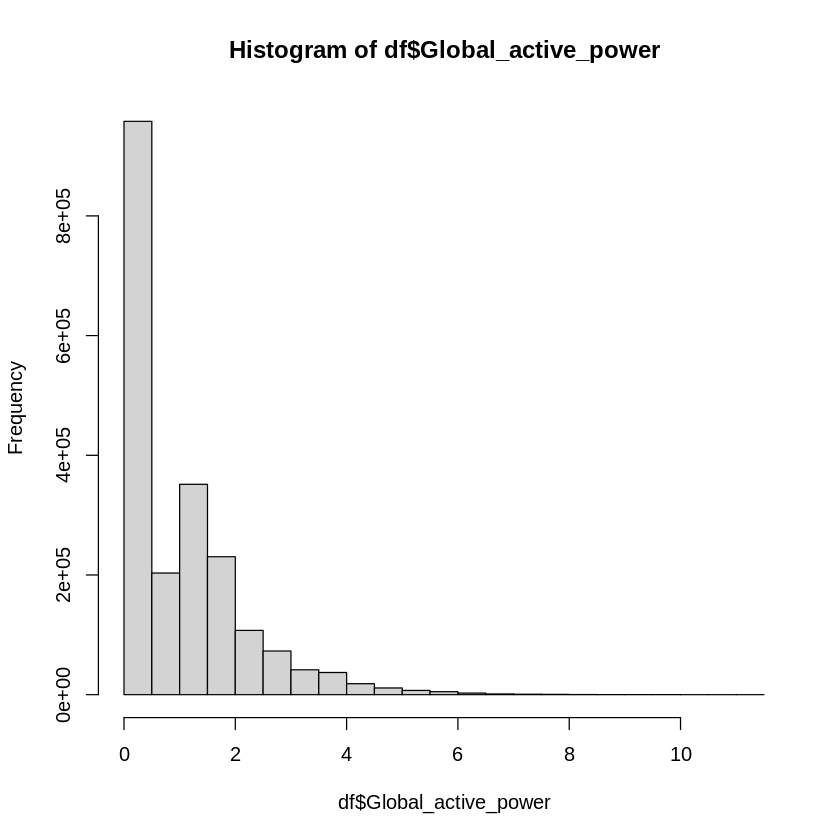

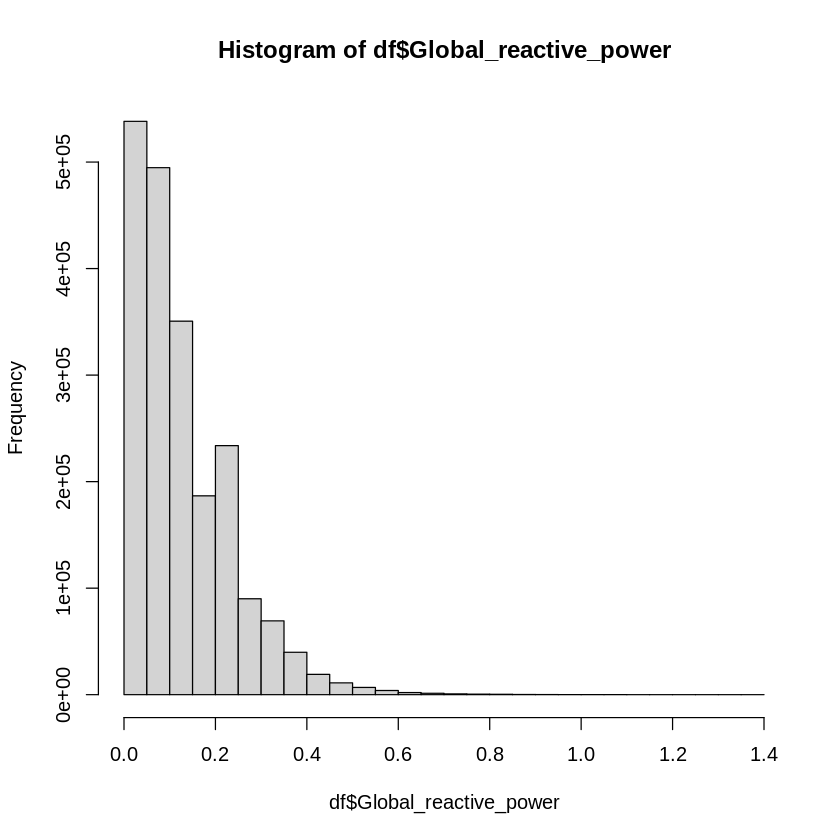

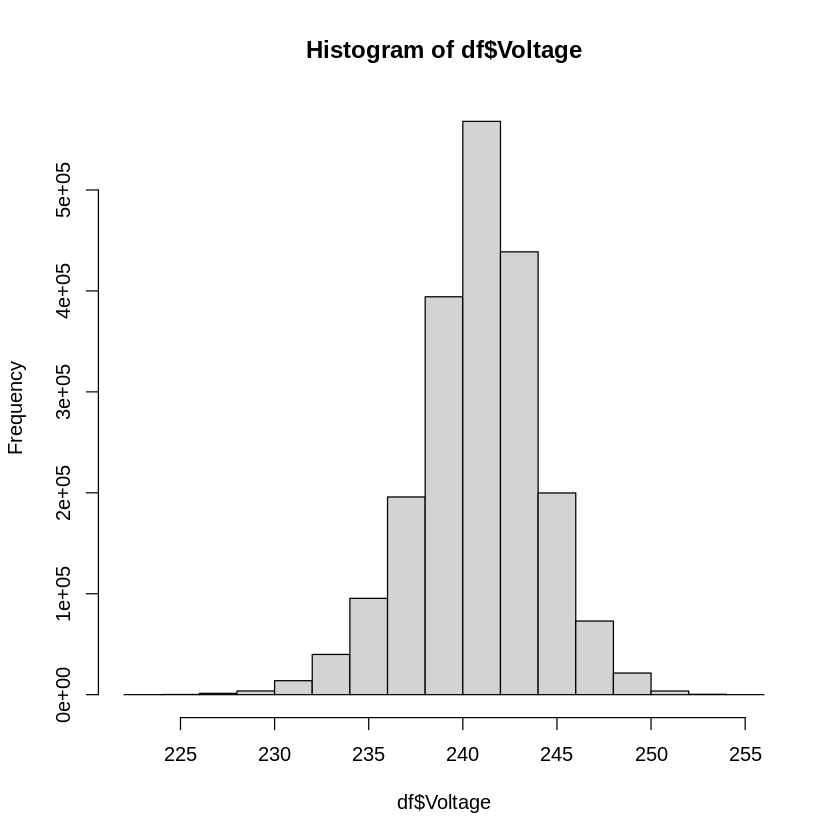

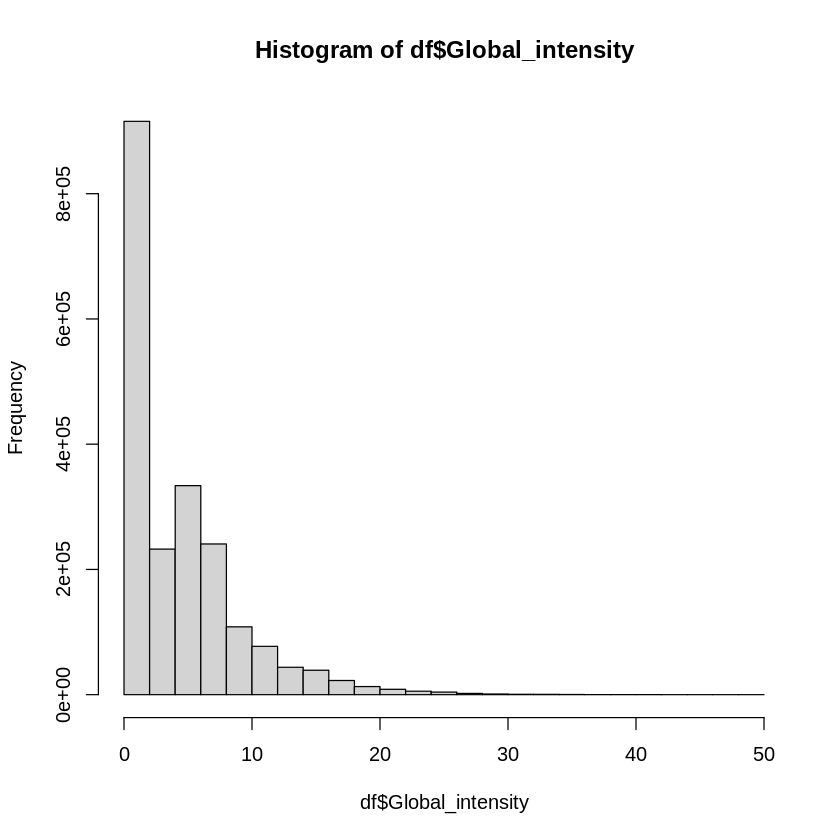

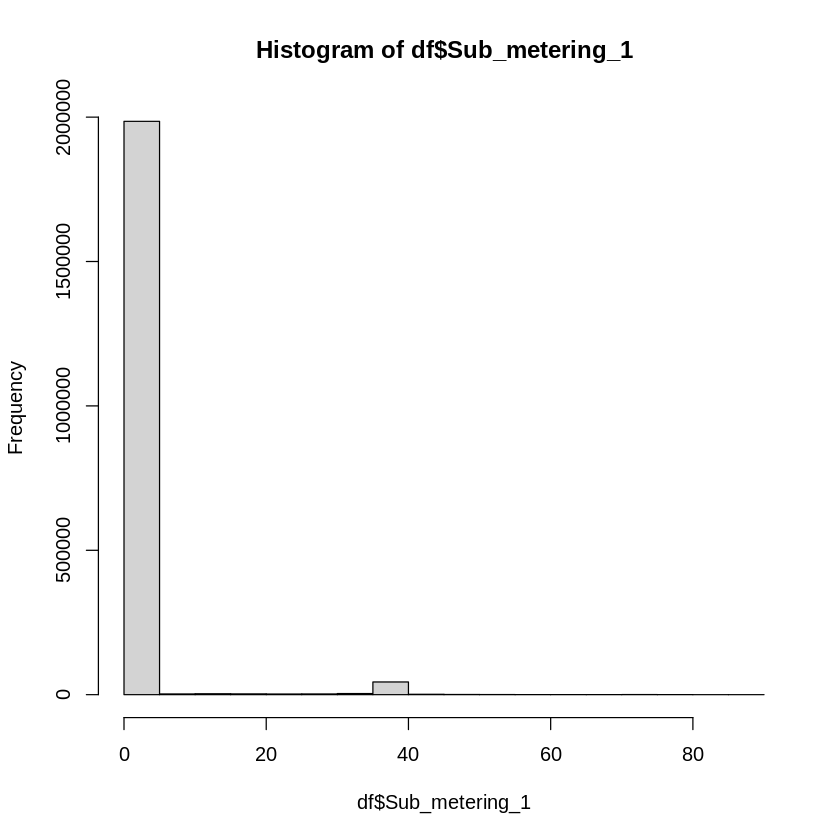

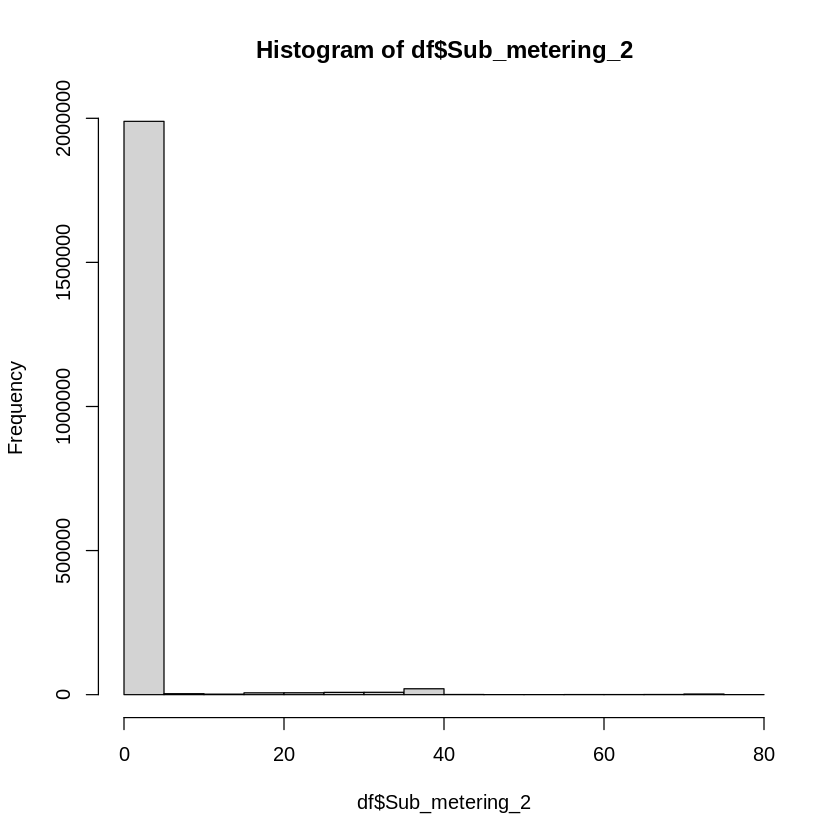

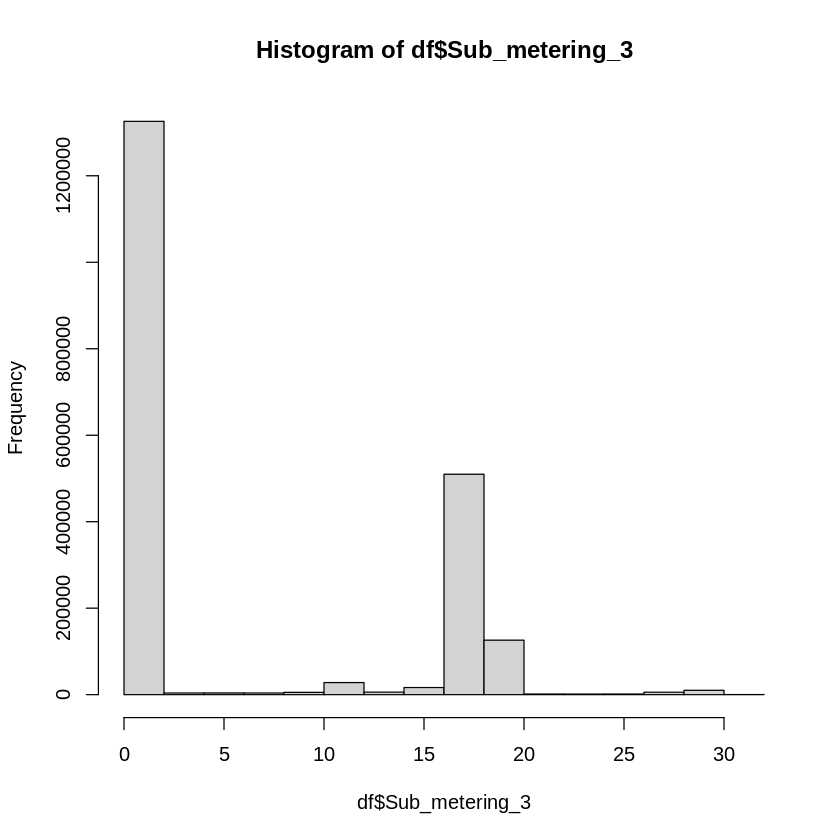

In [25]:
hist(df$Global_active_power)
hist(df$Global_reactive_power)
hist(df$Voltage)
hist(df$Global_intensity)
hist(df$Sub_metering_1)
hist(df$Sub_metering_2)
hist(df$Sub_metering_3)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




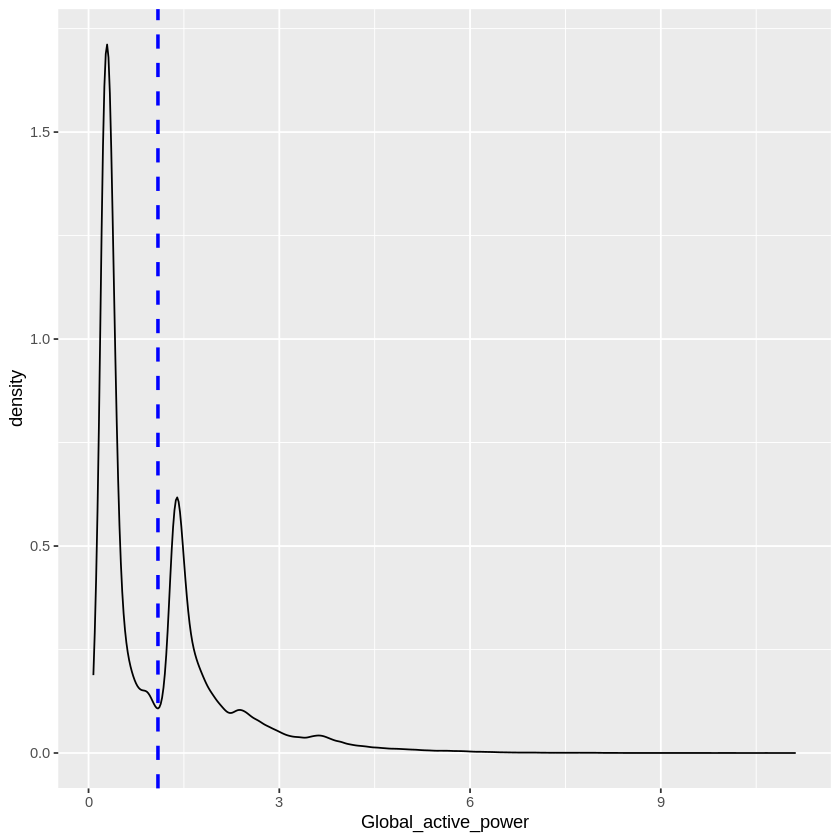

In [26]:
library(ggplot2)
# Basic density
p <- ggplot(df, aes(x=Global_active_power)) +
  geom_density() +
  geom_vline(aes(xintercept=mean(Global_active_power)),
            color="blue", linetype="dashed", linewidth=1)
p

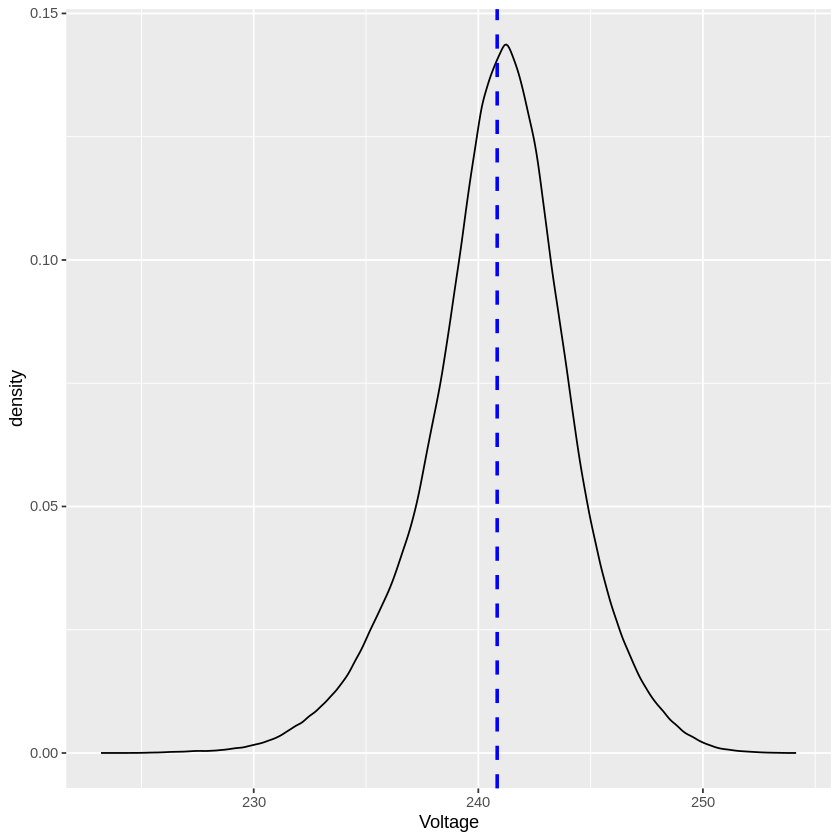

In [27]:
v <- ggplot(df, aes(x=Voltage)) +
  geom_density() +
  geom_vline(aes(xintercept=mean(Voltage)),
            color="blue", linetype="dashed", linewidth=1)
v

In [28]:
corr_df <- df[, c(2, 3, 4, 5,6,7,8)]
head(corr_df)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.216,0.418,234.84,18.4,0,1,17
2,5.360,0.436,233.63,23.0,0,1,16
3,5.374,0.498,233.29,23.0,0,2,17
4,5.388,0.502,233.74,23.0,0,1,17
5,3.666,0.528,235.68,15.8,0,1,17
6,3.520,0.522,235.02,15.0,0,2,17


In [29]:
library(corrplot)

corrplot 0.92 loaded



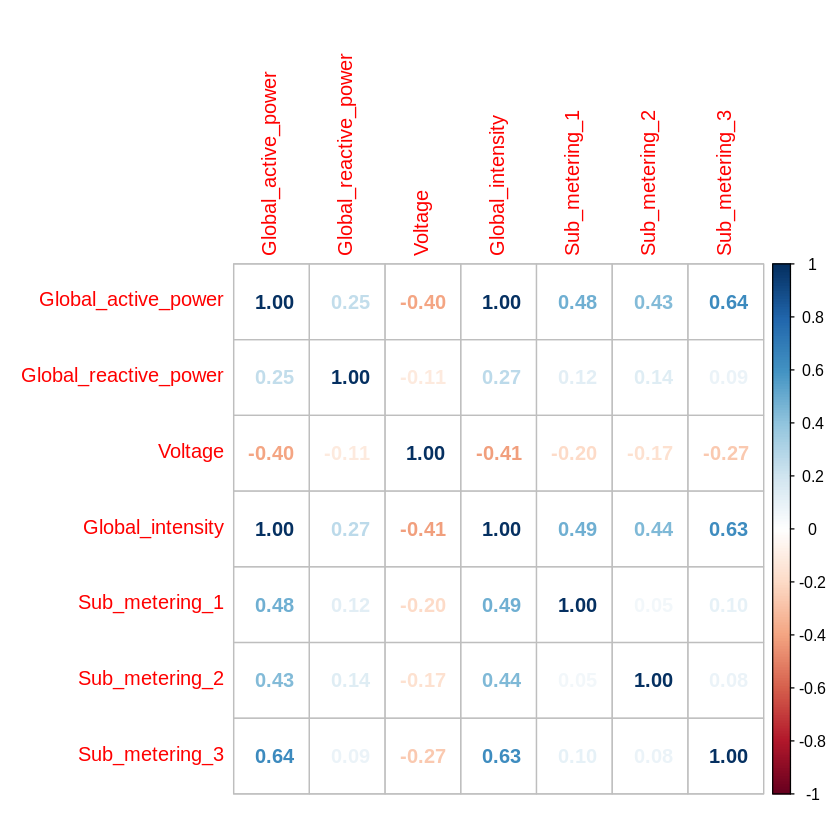

In [30]:
cor_matrix <- cor(corr_df, use="complete.obs")
corrplot(cor_matrix,method="number")

In [31]:
## Sampling the dataset as 2 million rows may cause problems like multicolinearity during the model generation
set.seed(32)
sample_df <- corr_df[sample(nrow(corr_df), 6000), ]
nrow(sample_df)

[1] 6000

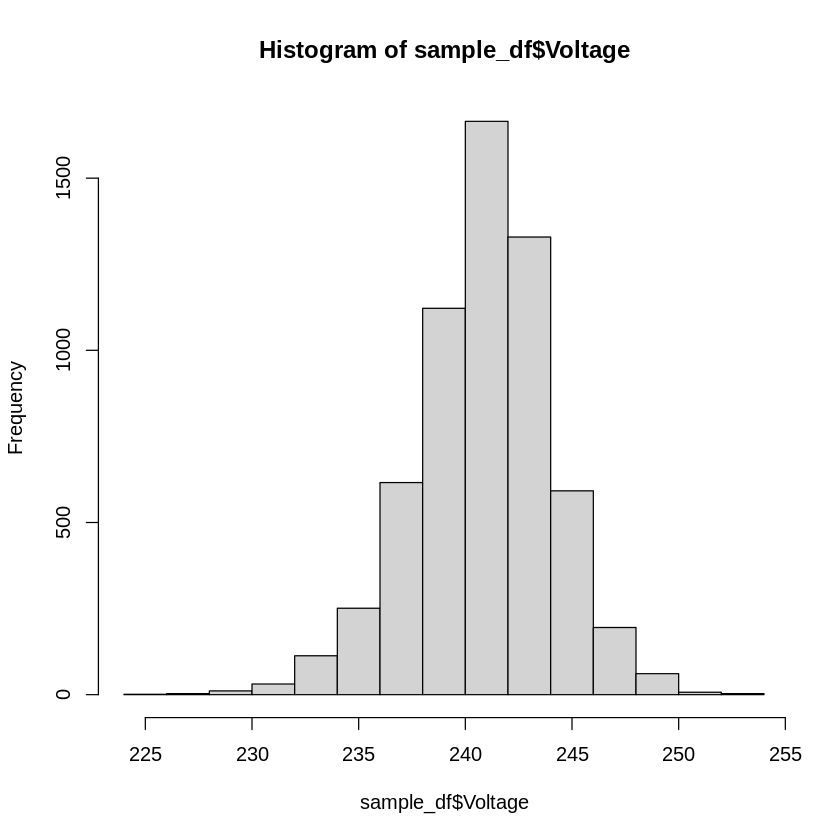

In [32]:
hist(sample_df$Voltage)

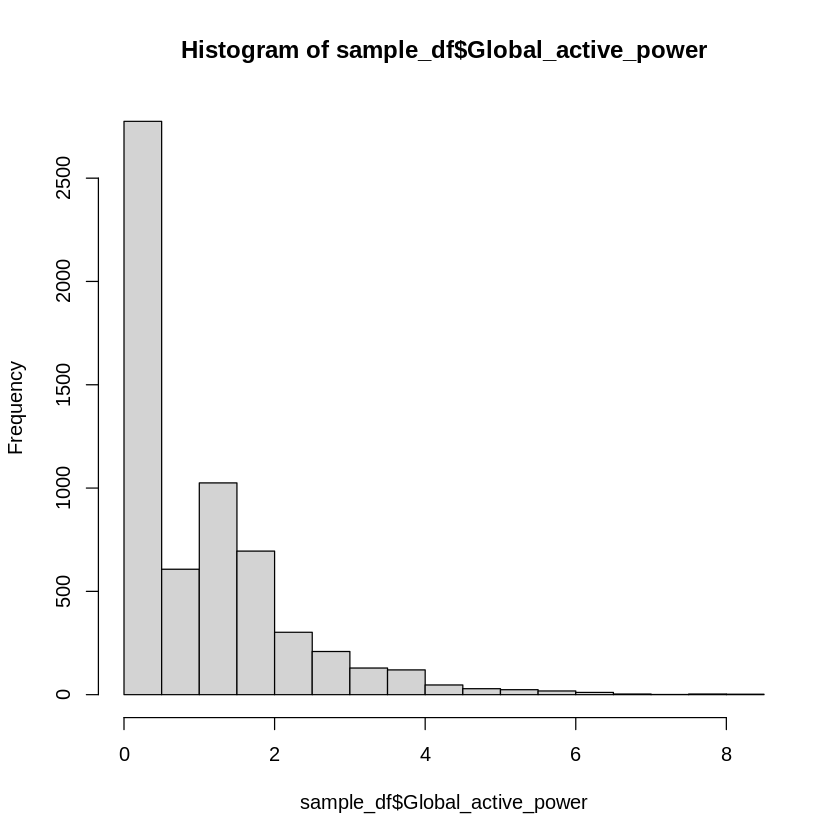

In [33]:
hist(sample_df$Global_active_power)

In [74]:
m_normalize <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

# Function to normalize the dataset
df_normalized <- as.data.frame(lapply(sample_df, function(x) if(is.numeric(x)) m_normalize(x)))

# Check the normalized dataset
head(df_normalized)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.02334337,0.0000000,0.8032054,0.02325581,0,0.00000000,0.03333333
2,0.04894578,0.2440758,0.5210585,0.05232558,0,0.01333333,0.00000000
3,0.04041165,0.1066351,0.6407007,0.04651163,0,0.01333333,0.00000000
4,0.36746988,0.1753555,0.4714871,0.36046512,0,0.00000000,0.60000000
5,0.03438755,0.1729858,0.5191949,0.04069767,0,0.01333333,0.00000000
6,0.17369478,0.2369668,0.5821841,0.16860465,0,0.00000000,0.60000000


## **Technique 1: Hypothesis Testing**

## Let H0 = There is no significant correlation between global active power and voltage
## H1 : There is a significant correlation between global active power and voltage


In [35]:
cor_test <- cor.test(df_normalized$Global_active_power, df_normalized$Voltage)
print(cor_test)


	Pearson's product-moment correlation

data:  df_normalized$Global_active_power and df_normalized$Voltage
t = -35.326, df = 5998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4357308 -0.3938344
sample estimates:
       cor 
-0.4150026 



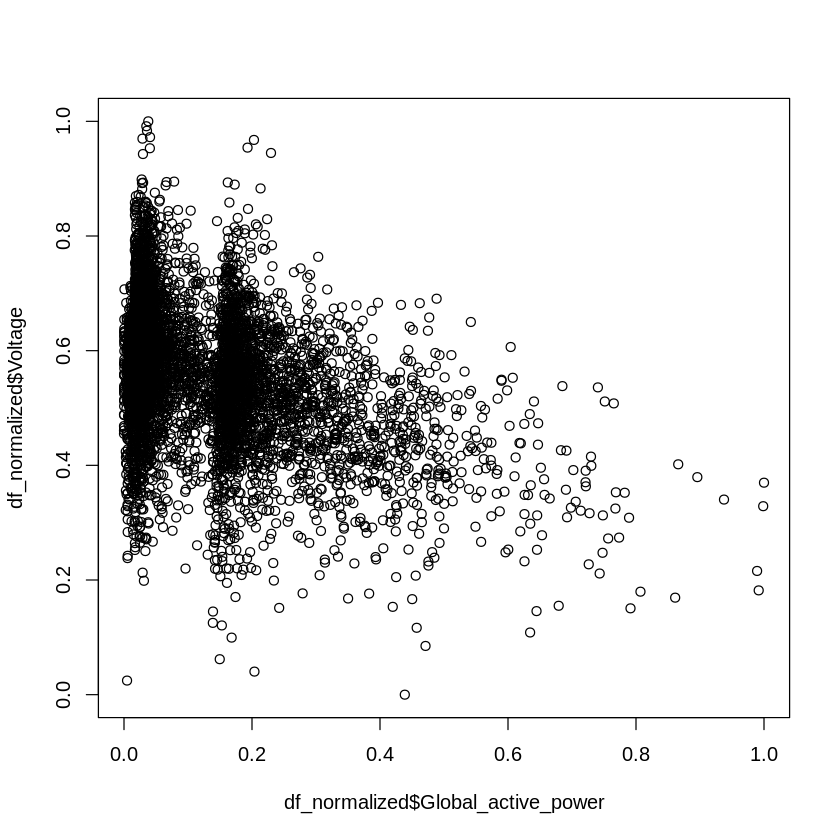

In [36]:
plot(df_normalized$Global_active_power, df_normalized$Voltage)

## The p-value of the correlation test between these 2 variables is smaller than 0.05. So at the 5% significance level, we will reject the null hypothesis of no significant correlation. We therefore conclude that we do reject the hypothesis that there is no correlation between the 2 variables.

## Also, from the above scatterplot between Global_active_power and Voltage, we can also see that there exists a negative correlation between the 2 variables.

## **Technique 2 : Regression Analysis**

In [37]:
lm_Voltage = lm(Voltage ~ Global_active_power + Global_reactive_power + Global_intensity + Sub_metering_1 + Sub_metering_2 + Sub_metering_3 , data = sample_df )

summary(lm_Voltage)


Call:
lm(formula = Voltage ~ Global_active_power + Global_reactive_power + 
    Global_intensity + Sub_metering_1 + Sub_metering_2 + Sub_metering_3, 
    data = sample_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0057  -1.5423   0.0202   1.6331  13.0954 

Coefficients:
                        Estimate Std. Error  t value Pr(>|t|)    
(Intercept)           242.271765   0.061717 3925.521  < 2e-16 ***
Global_active_power    20.567897   0.846163   24.307  < 2e-16 ***
Global_reactive_power   2.992008   0.359569    8.321  < 2e-16 ***
Global_intensity       -5.169866   0.200824  -25.743  < 2e-16 ***
Sub_metering_1          0.013683   0.007312    1.871   0.0613 .  
Sub_metering_2          0.019820   0.007122    2.783   0.0054 ** 
Sub_metering_3         -0.050339   0.006251   -8.053 9.66e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.752 on 5993 degrees of freedom
Multiple R-squared:  0.2557,	Adjusted R-squared:  0.25

## From the above summary statistics, we can say that all independent variables other than Sub_metering_1 are significant to the regression model as the p-value for each feature is less than 0.05, hence we can say that the model is significant.

## **Technique 3: Diagnostics of the model**

### 1. Checking for Constant Variance

In [38]:
res_lm_Voltage <- residuals(lm_Voltage, "pearson")

In [39]:
fit_lm_Voltage <- fitted(lm_Voltage)

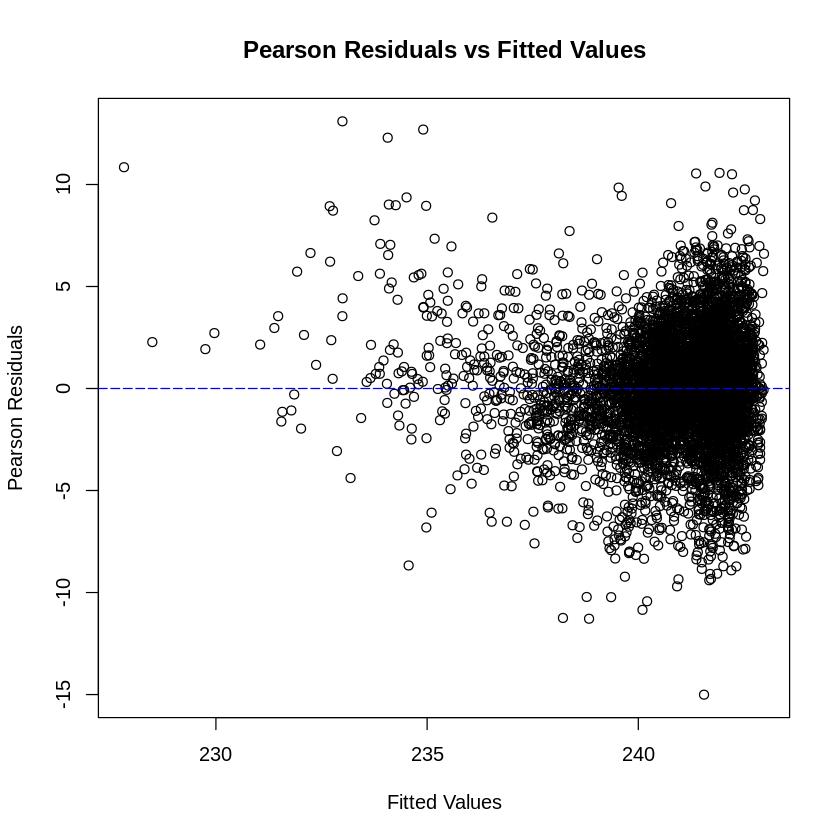

In [40]:
plot( fit_lm_Voltage,res_lm_Voltage, xlab = "Fitted Values", ylab = "Pearson Residuals",
     main = "Pearson Residuals vs Fitted Values")

abline(h = 0, col = "blue", lty = 5)

## This is a case of heteroscedasticity as we can observe 2 horn pattern forming at the end of the graph. Hence, variance is non-constant.

## Checking for Normality

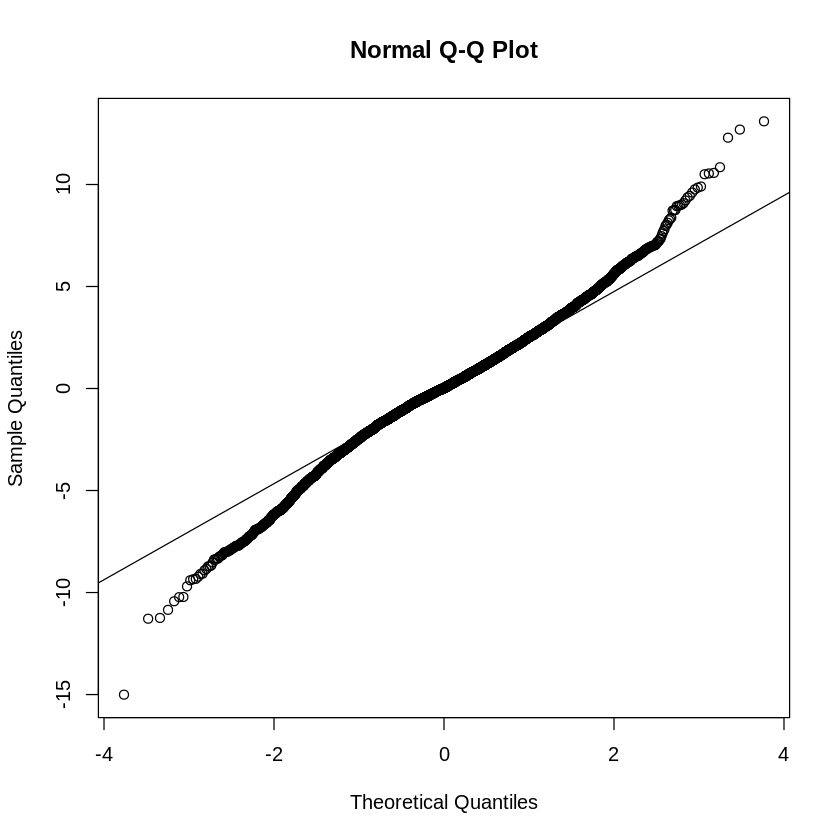

In [41]:
qqnorm(res_lm_Voltage)

## add a straight diagonal line to the plot
qqline(res_lm_Voltage)

## This assumption is potentially violated because upon analyzing Q-Q plot we observe deviation in the lower & higher values (before quantile value= -1 & after quantile value = 2). There must be overlap between points and line to satisfy the Normality condition. Hence, we can say that normality is violated for this case.

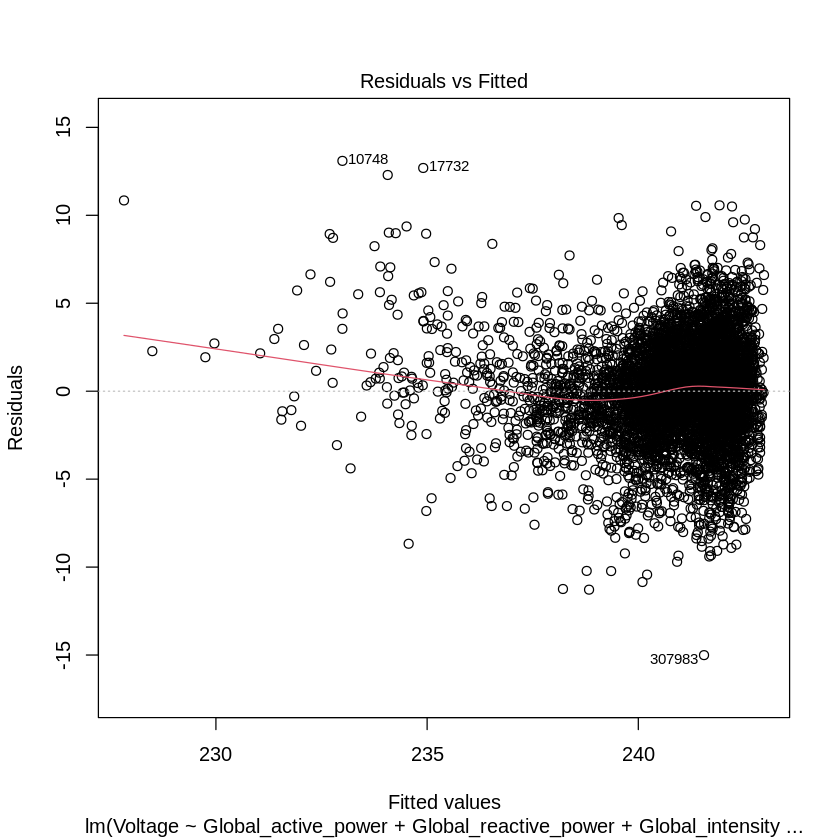

In [42]:
plot(lm_Voltage,1)

This assumption is violated because upon analyzing Residuals VS Fitted values plot we observe multiple curves in the plot. As there need to be a linear relationship between the response variable and the independent variables, we can say that linearity is violated.

## **Technique 4: T-Test**

In [43]:
coeficient <- coef(lm_Voltage)
coeficient

(Intercept)   Global_active_power Global_reactive_power 
         242.27176488           20.56789659            2.99200802 
     Global_intensity        Sub_metering_1        Sub_metering_2 
          -5.16986608            0.01368337            0.01982023 
       Sub_metering_3 
          -0.05033927

In [44]:
s_error <- summary(lm_Voltage)$coefficients[, "Std. Error"]
s_error

(Intercept)   Global_active_power Global_reactive_power 
          0.061717097           0.846163063           0.359569306 
     Global_intensity        Sub_metering_1        Sub_metering_2 
          0.200824015           0.007311553           0.007122099 
       Sub_metering_3 
          0.006250919

In [45]:
t_test_Values <- coeficient/s_error

In [46]:
p_values <- 2 * pt(abs(t_test_Values), df = lm_Voltage$df.residual, lower.tail = FALSE)

In [47]:
results <- data.frame(Coefficient = coeficient, Std.Error = s_error, t_value = t_test_Values, p_value = p_values)
results

,Coefficient,Std.Error,t_value,p_value
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),242.27176488,0.061717097,3925.521044,0.000000e+00
Global_active_power,20.56789659,0.846163063,24.307249,1.490576e-124
Global_reactive_power,2.99200802,0.359569306,8.321089,1.069016e-16
Global_intensity,-5.16986608,0.200824015,-25.743266,1.050368e-138
Sub_metering_1,0.01368337,0.007311553,1.871472,6.132830e-02
Sub_metering_2,0.01982023,0.007122099,2.782920,5.404074e-03
Sub_metering_3,-0.05033927,0.006250919,-8.053099,9.659918e-16


## T-Test for only 1 Feature

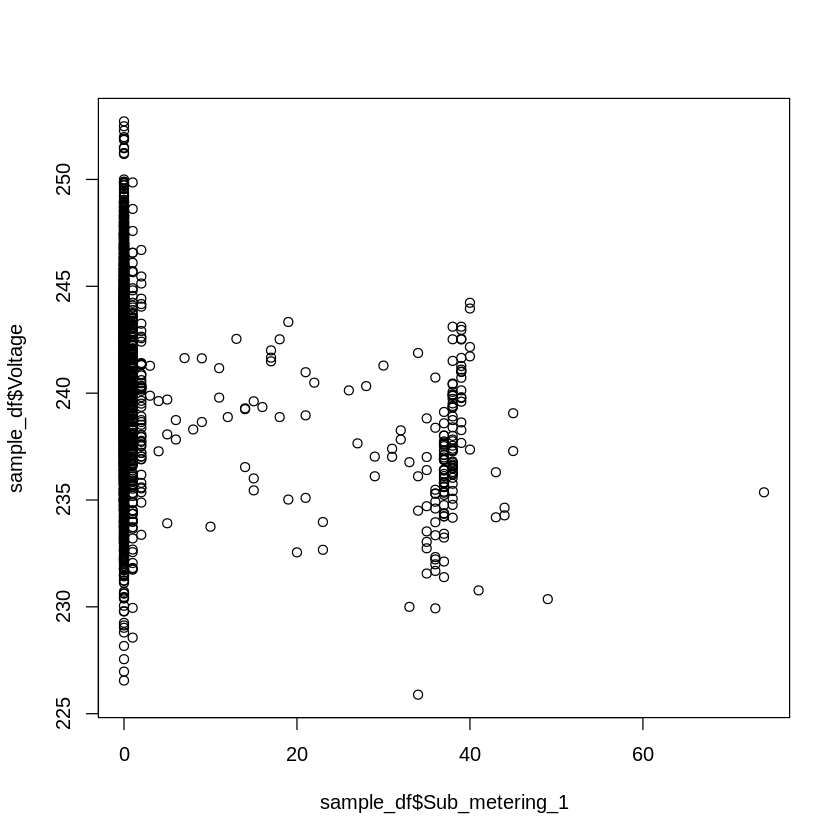

In [75]:
set.seed(100)
plot(sample_df$Sub_metering_1, sample_df$Voltage)

## The visual inspection supports our assumption, that the relationship between the Voltage and the Sub_metering_1 variable is non linear.


## H0: predictor variable Sub_metering_1 is not useful for making predictions
## H1: predictor variable Sub_metering_1 is useful for making predictions

In [76]:
y_bar <- mean(sample_df$Voltage)
x_bar <- mean(sample_df$Sub_metering_1)

lm_beta <- cov(sample_df$Sub_metering_1, sample_df$Voltage) / var(sample_df$Sub_metering_1)
lm_beta

[1] -0.1077792

In [77]:
lm_alpha <- y_bar - lm_beta * x_bar
lm_alpha

[1] 240.9936

In [78]:
# sum of squares errors SSE
y_hat <- lm_alpha + lm_beta * sample_df$Sub_metering_1
SSE <- sum((sample_df$Voltage - y_hat)^2)
SSE

[1] 58462.69

In [79]:
se <- sqrt(SSE / (60 - 2))
se

[1] 31.74866

In [80]:
t <- lm_beta / (se / sqrt(sum((sample_df$Sub_metering_1 - x_bar)^2)))
t

[1] -1.58053

In [81]:
df1 <- length(sample_df$Sub_metering_1) - 2

# two-sided test
p_upper <- pt(abs(t), df = df1, lower.tail = FALSE)
p_lower <- pt(-abs(t), df = df1, lower.tail = TRUE)
p <- p_upper + p_lower
p

[1] 0.1140382

## The p-value is greater than the significance level of 0.05; we fail to reject H0: The test results are not statistically significant at the 5 % level and provide very strong evidence for the null hypothesis.

## **Technique 5: Model Selection**

In [55]:
pred1 = predict(lm_Voltage, sample_df);
m_Test1 = with(sample_df, sum((Voltage - pred1)^2)/(dim(sample_df)[1]));
m_Test1

[1] 7.565003

In [56]:
lm_Voltage = update(lm_Voltage, . ~ . -Sub_metering_1)
summary(lm_Voltage)


Call:
lm(formula = Voltage ~ Global_active_power + Global_reactive_power + 
    Global_intensity + Sub_metering_2 + Sub_metering_3, data = sample_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9917  -1.5346   0.0165   1.6457  13.0068 

Coefficients:
                        Estimate Std. Error  t value Pr(>|t|)    
(Intercept)           242.246081   0.060184 4025.058  < 2e-16 ***
Global_active_power    20.478337   0.844985   24.235  < 2e-16 ***
Global_reactive_power   2.954962   0.359099    8.229  2.3e-16 ***
Global_intensity       -5.133145   0.199905  -25.678  < 2e-16 ***
Sub_metering_2          0.016090   0.006839    2.353   0.0187 *  
Sub_metering_3         -0.053821   0.005969   -9.017  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.753 on 5994 degrees of freedom
Multiple R-squared:  0.2552,	Adjusted R-squared:  0.2546 
F-statistic: 410.8 on 5 and 5994 DF,  p-value: < 2.2e-16


In [57]:
pred2 = predict(lm_Voltage, sample_df);
m_Test2 = with(sample_df, sum((Voltage - pred2)^2)/(dim(sample_df)[1]));

In [58]:
m_Test2

[1] 7.569424

In [59]:
print(m_Test1)
print(m_Test2)

[1] 7.565003
[1] 7.569424


In [60]:
n = dim(sample_df)[1];
reg1 = regsubsets(Voltage ~ Global_active_power + Global_reactive_power + Global_intensity + Sub_metering_1 + Sub_metering_2 + Sub_metering_3 , data = sample_df)
rs = summary(reg1)
rs$which

,(Intercept),Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE
3,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE
4,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE
5,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE
6,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


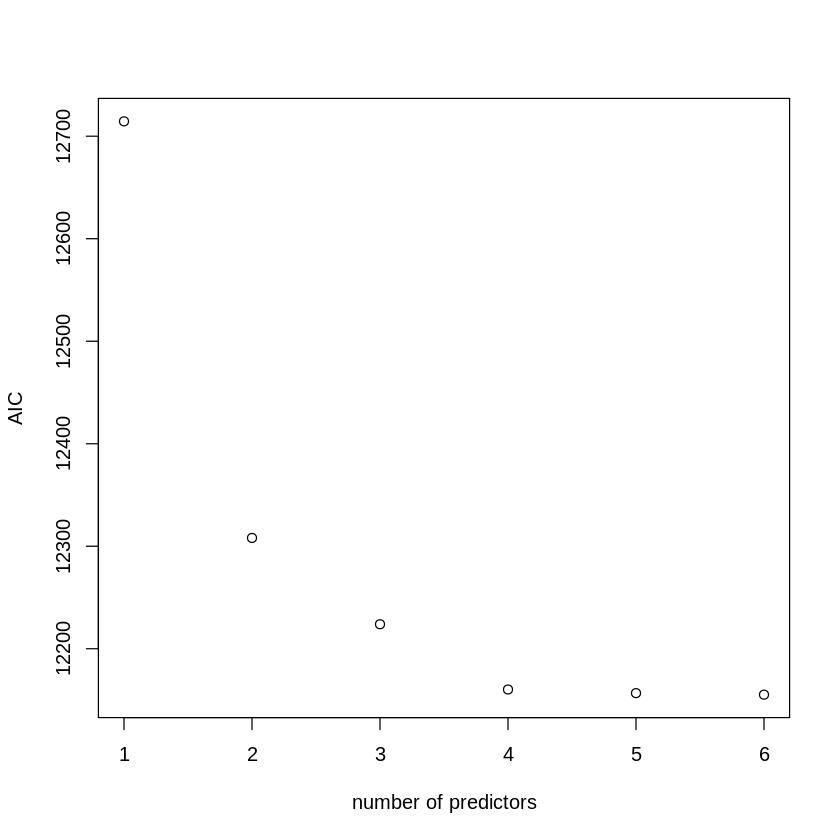

In [61]:
AIC = 2*(2:7) + n*log(rs$rss/n)
plot(AIC ~ I(1:6), xlab = "number of predictors", ylab = "AIC")

From Akaike information criterion (AIC) test, we can see that the best model is the full model as it has the lowest AIC value.

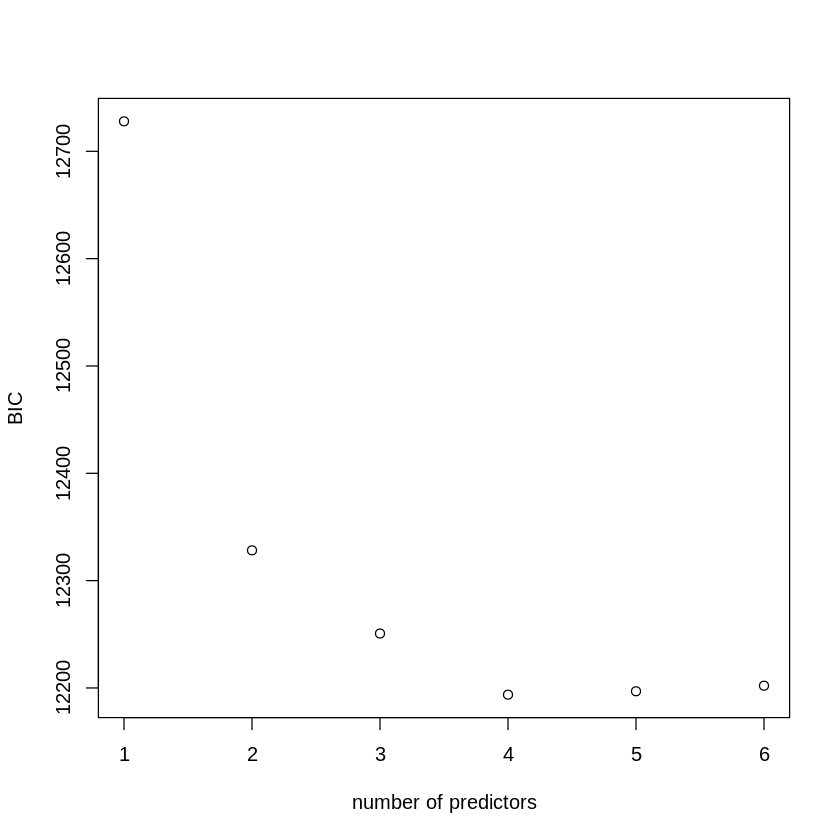

In [62]:
BIC = log(n)*(2:7) + n*log(rs$rss/n)
plot(BIC ~ I(1:6), xlab = "number of predictors", ylab = "BIC")

From Bayesian information criterion (BIC), we can observe that model without features Sub_metering_1 & Sub_metering_2 is the best model as the BIC value is minimum for this model.

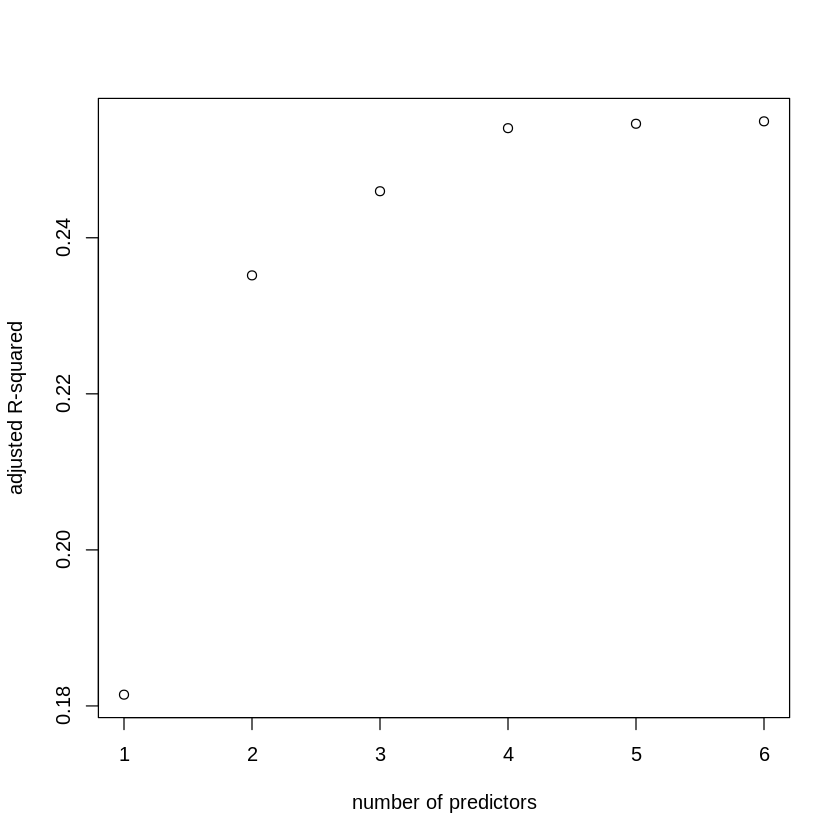

In [63]:
plot(1:6, rs$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared")

From Adjusted R^2, we can infer that full model is the best model as it has the highest value for adjusted R^2.

## **Since, full model is the best model according to AIC, MSPE and adjusted R^2, hence we can conclude that full model is the best model for this dataset.**

## **Report**

# HOUSEHOLD POWER CONSUMPTION ANALYSIS

### **Introduction**

Power consumption data plays a vital role in shaping energy management strategies, promoting sustainability, and ensuring the reliable and efficient delivery of electricity to meet the needs of society. It aids cost management by allowing businesses and individuals to identify energy wastage areas, ultimately reducing utility bills. Furthermore, power consumption data helps with infrastructure planning, guiding investment decisions for new facilities and upgrades. Accurate data also facilitates demand forecasting, helping utilities anticipate peak usage and prevent shortages. Recently, techniques in machine learning field achieving impressive performance in a vast range of tasks, from image classification to machine translation are coming up which can help accurately predict trends and values. This work aims at predicting the voltage consumption of a household at a particular time period based on features like Global_active_power, Global_reactive_power, Global_intensity, Sub_metering_1, Sub_metering_2 & Sub_metering_3. This acted as a motivation for this analysis as this could help with enabling efficient allocation for large-scale energy providers and individual consumers to prevent system overload.

### **Data Description**
The dataset comprises electric power consumption measurements from a single household, recorded at a one-minute sampling rate spanning nearly four years. It includes various electrical quantities and sub-metering values, totaling 2,075,259 measurements. These data were collected from a residence situated in Sceaux, located approximately 7 kilometers from Paris, France, between December 2006 and November 2010 (a span of 47 months). The primary objective of gathering this dataset was to analyze the household's power consumption trends over time. Below are the features included in the dataset, along with their respective definitions.

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

The dataset was collected from UC Irvine Machine Learning Repository
(https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption)

Multiple research studies have been conducted on this data which involves utilizing deep learning, neural networks and unsupervised learning methods for forecasting the electric load required for a household. Research titled “Machine Learning Approaches to Energy Consumption Forecasting in Households” by Riccardo Bonetto & M. Rossi gives good idea about how machine learning models can be used to forecast energy consumption.

## **Data Pre-Processing**
Data cleaning steps were performed on the dataset to make it suitable for modelling. The dataset contained null values which can lead to incorrect modelling. As the percentage of null values was only 1.24% of the dataset, the null values were removed from the dataset.
Duplicate values act as a source of multicollinearity in the data. Presence of no duplicate values in the dataset was a good sign.
Column datatype conversion was required to convert the numerical columns to integer data type from string without which, regression modelling would not be possible. Another field called DateTime was created by merging the Data and Time columns and changing the datatype to timestamp.



## **Methods**

**Dataset Collection**

This dataset was downloaded from the UCI Machine Learning Repository. As the dataset contains more than 2 million data points, the dataset was available in a text file. This file was used to create data-frame in R.  

**Questions of Interest**

Through this analysis, we would try to answer the following questions:

***Research Question 1***

Is there a significant correlation between features like global active power and voltage?

**Null Hypothesis (H0):** The null hypothesis assumes that there is no significant correlation between global active power and voltage.

**Alternative Hypothesis (H1):** The alternative hypothesis posits that there is a significant correlation between global active power and voltage.

***Research Question 2***

We find out which features are best to create a regression model for predicting the voltage of the household at a particular date & time.

***Research Question 3***
We check whether a feature is useful for predicting the household voltage or not?

**Null Hypothesis (H0):** The null hypothesis posits that predictor variable Sub_metering_1 is not useful for making predictions.

**Alternative Hypothesis (H1):** The alternative hypothesis suggests that predictor variable Sub_metering_1 is useful for making predictions.

***Research Question 4***

Finally, we select the best regression model for this dataset using various statistical methods.

## **Results**

Exploratory Data Analysis
As previously mentioned, the analysis will consist of looking at eight variables of interest. Those
are Voltage, Global_active_power, Global_reactive_power, Global_intensity, Sub_metering_1, Sub_metering_2 & Sub_metering_3.

**Correlation Matrix**

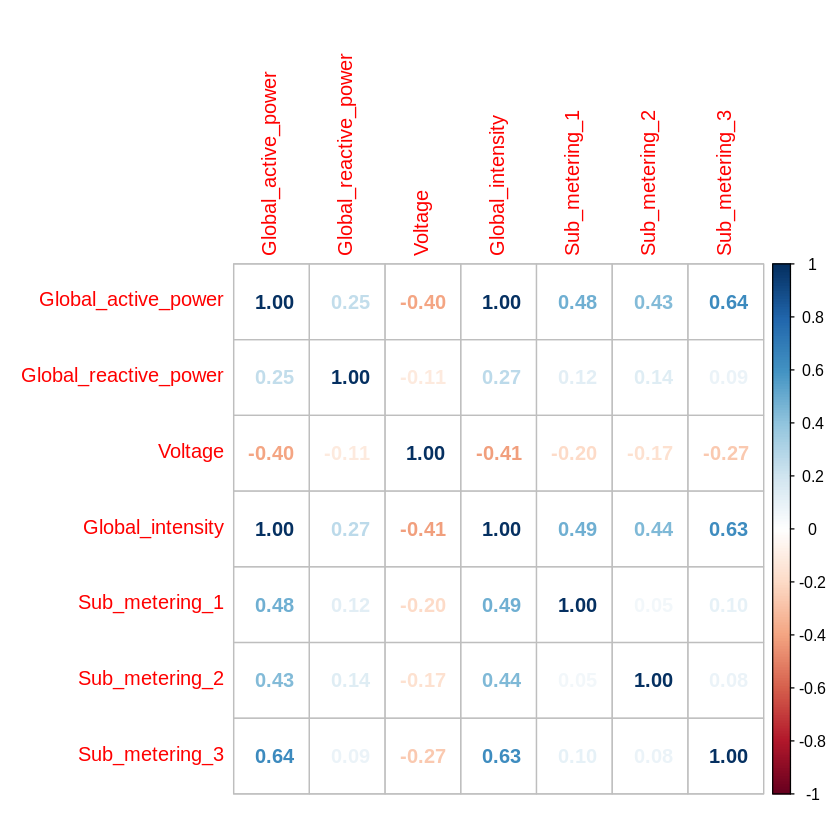

From the above image, we can observe that Global_active_power and Global Intensity are highly correlated variables. They have a positive correlation between them. Also, Global_active_power has a strong correlation with Sub_metering_3. We can also see few more positive correlations between   Sub_metering_1 & Sub_metering_2 and Global_intensity. Overall, we have various strong and weak correlations between the features.
The features like Voltage and Global_active_power, Global_intensity, Sub_metering_1, Sub_metering_2 and Sub_metering_3 are negatively correlated to each other, however the correlation is not very strong.


***Research Question 1***

**Null Hypothesis (H0):** The null hypothesis assumes that there is no significant correlation between global active power and voltage.

**Alternative Hypothesis (H1):**
The alternative hypothesis posits that there is a significant correlation between global active power and voltage.

**Plot showing negative correlation between variables**

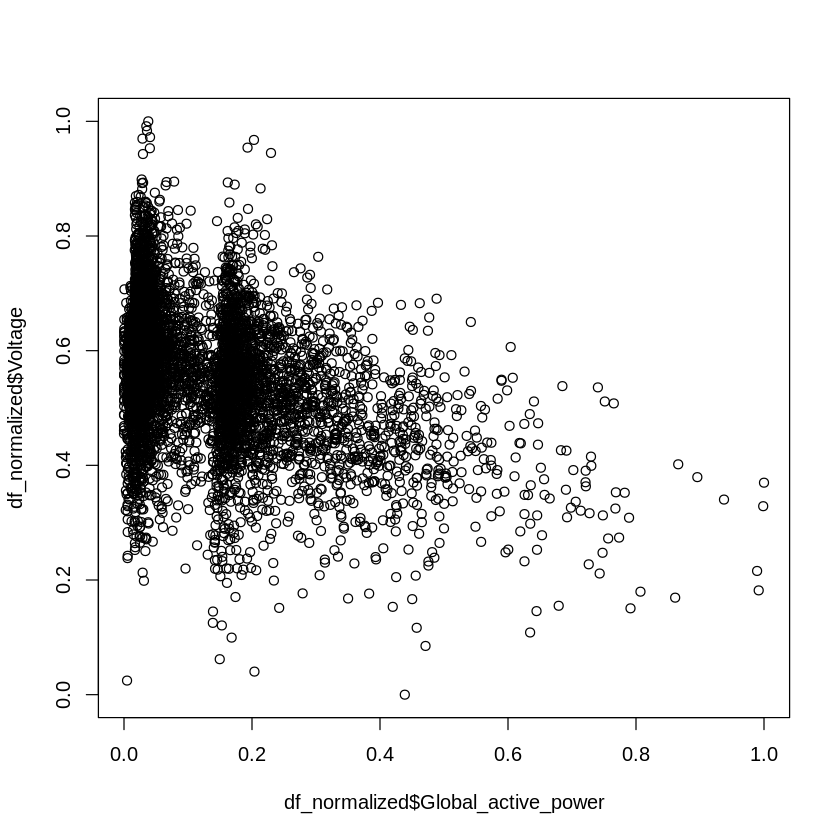

The statistical analysis yielded a very small p-value, providing strong evidence against the null hypothesis. The correlation test further indicates a deviation from the hypothesized mean. Therefore, we reject the null hypothesis, concluding that there is a significant correlation between global active power and voltage.

***Research Question 2***

We find out which features are best to create a regression model for predicting the voltage of the household at a particular date & time.
Initially, we create a full multiple linear regression model which shows us that all independent variables other than Sub_metering_1 are significant to the regression model as the p-value for each feature is less than 0.05, hence we can say that the model is significant.
Next, we will check the assumptions which are mandatory for an MLR model.


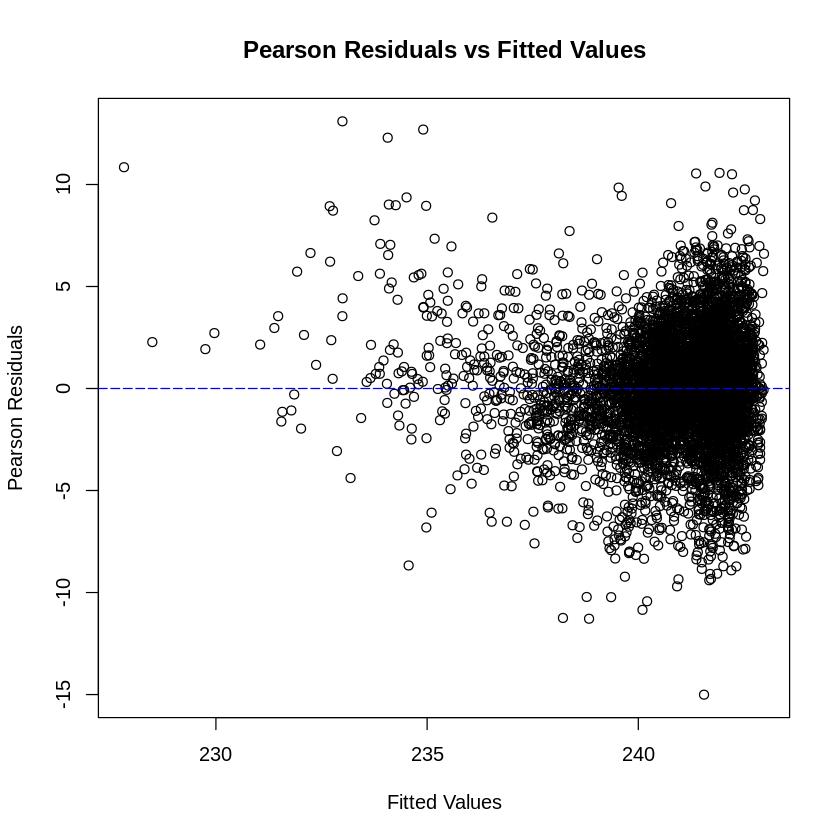

First, we performed a test for constant variance. This graph depicts heteroscedasticity as there is a two horn pattern observable in the Pearson Residuals vs Fitted Values graph. This shows that the model violates the first assumption of constant variance.

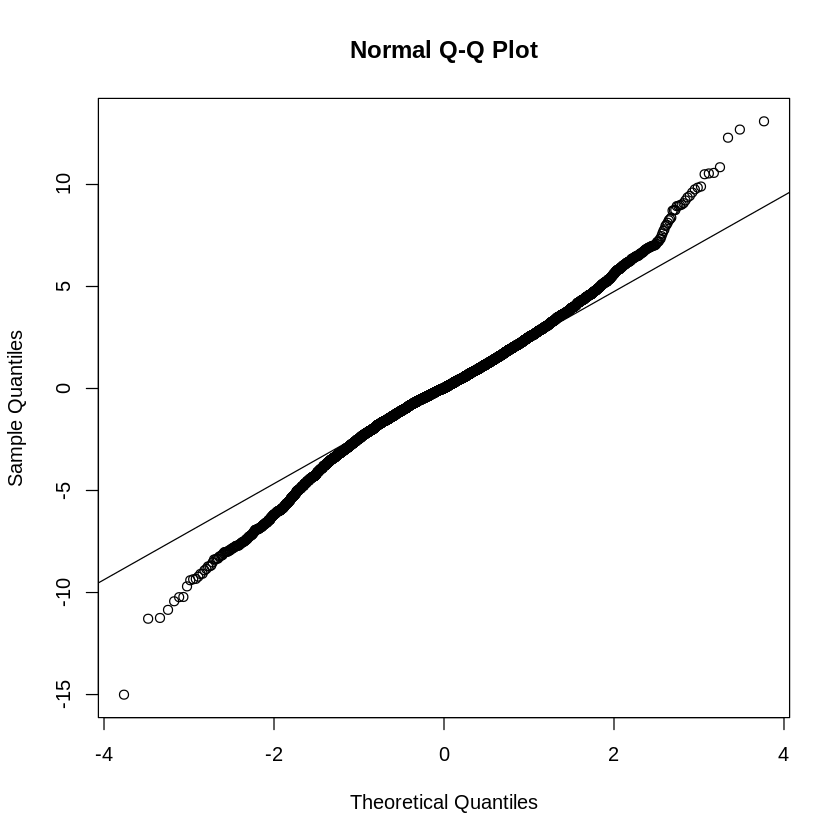

Second, we performed a test for normality with the help of QQ plot between theoretical and sample quantiles. Herem we observed deviation in the lower & higher values (before quantile value= -1 & after quantile value = 2). As there should be an overlap between points and line to satisfy the Normality condition, we can say that normality is violated for this case.

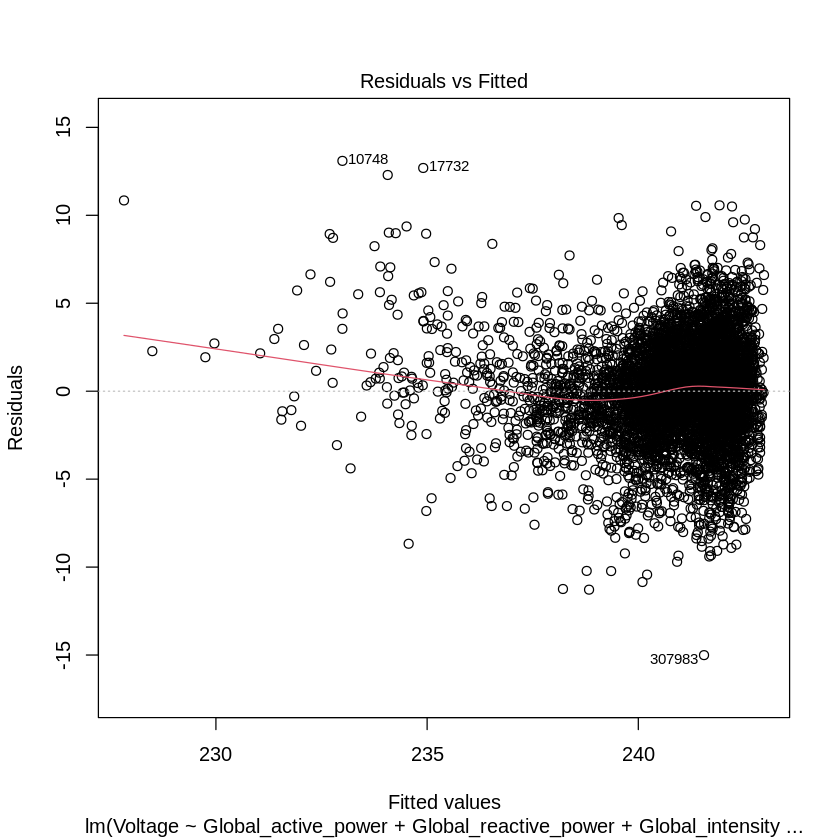

Finally, from the residuals vs fitted values, we can observe that the plot violates linearity as we can observe multiple curves in the plot.

***Research Question 3***

**Null Hypothesis (H0):**
The null hypothesis posits that predictor variable Sub_metering_1 is not useful for making predictions.

**Alternative Hypothesis (H1):**

The alternative hypothesis suggests that predictor variable Sub_metering_1 is useful for making predictions.

The statistical analysis yielded a large p-value, providing strong evidence in favour of null hypothesis. The t-test hence indicates that we fail to reject the null hypothesis, concluding that for a small sample size, Sub_metering_1 is not useful for making predictions.


***Research Question 4***

To identify the best model, we will conduct multiple tests on the models:

1. Calculate the mean squared prediction error (MSPE) on the sample.

The MSPE obtained on full model is 7.5650.

From research question 3, we concluded that Sub_metering_1 is insignificant. Hence, we will check the MSPE of the model by removing this feature from the model. The MSPE obtained on updated model is 7.5694.

So, MSPE indicates that full model is a better model.


2. Now, we will compute the best model of various sizes upto the full model. Then, among the remaining models, we will compute the best model according the AIC, BIC, and 𝑅2𝑎.

The Akaike information criterion (AIC) is a mathematical tool employed to assess the degree to which a model aligns with the dataset from which it was derived. Within statistical analysis, AIC serves as a means to compare various models and ascertain the most appropriate fit for the given data.

**Plot for AIC score for different number of predictors**

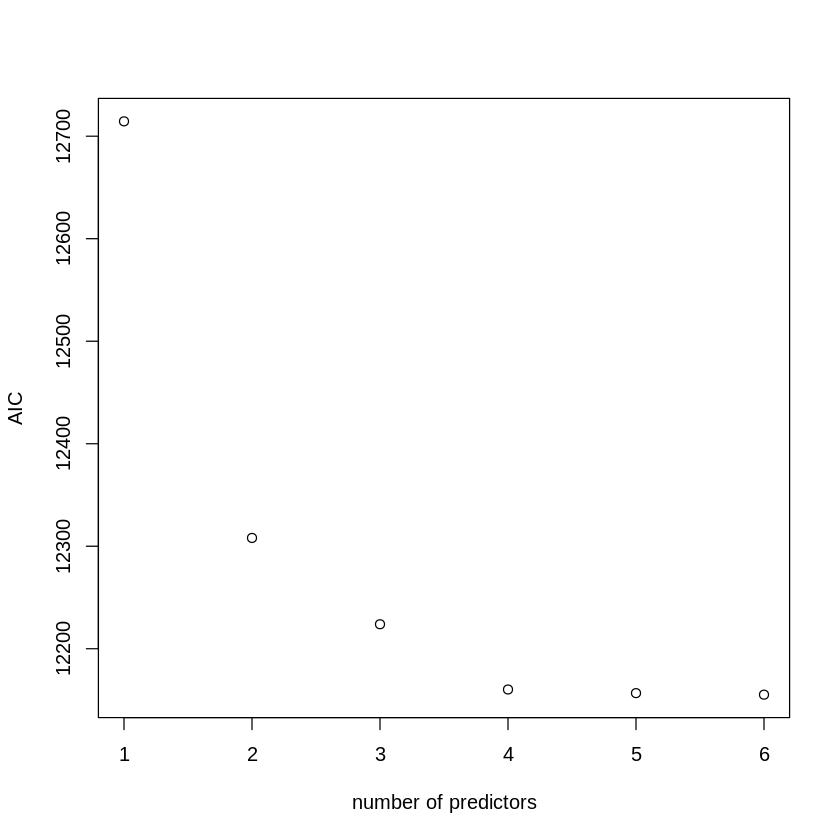

From Akaike information criterion (AIC) test, we can see that the best model is the full model as it has the lowest AIC value.

The Bayesian Information Criterion (BIC) is a statistical metric utilized for model selection and hypothesis testing, seeking to identify the optimal model among multiple candidates. This approach balances both model accuracy and complexity, aiming to pinpoint the most parsimonious and informative model available.

**Plot for BIC score for different number of predictors**

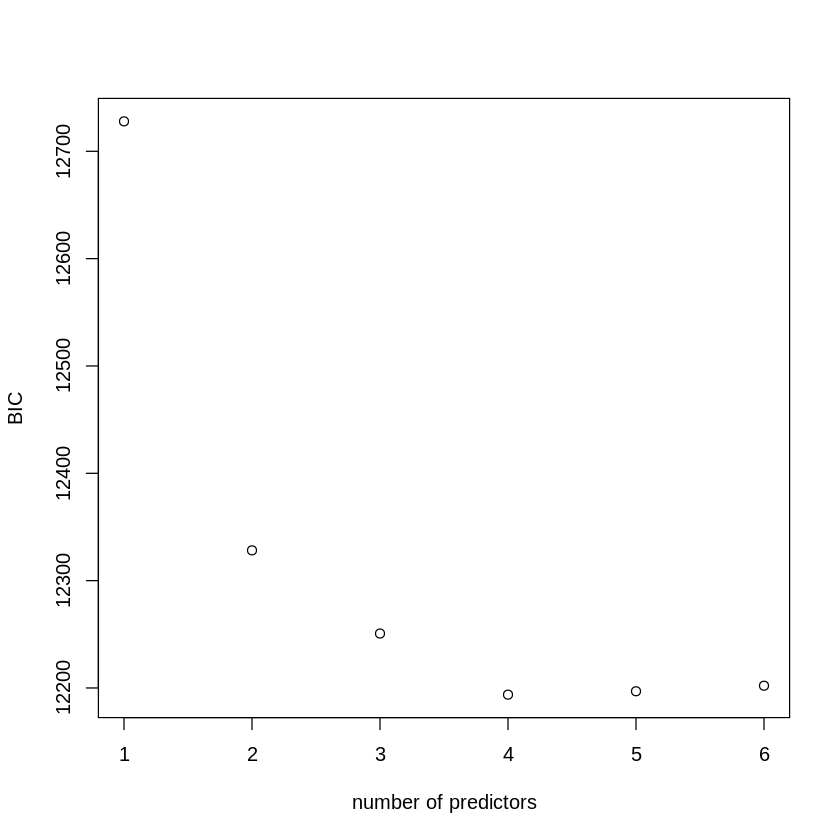

From Bayesian information criterion (BIC), we can observe that model without features Sub_metering_1 & Sub_metering_2 is the best model as the BIC value is minimum for this model.

**Plot for Adjusted $R^2$ score for different number of predictors**

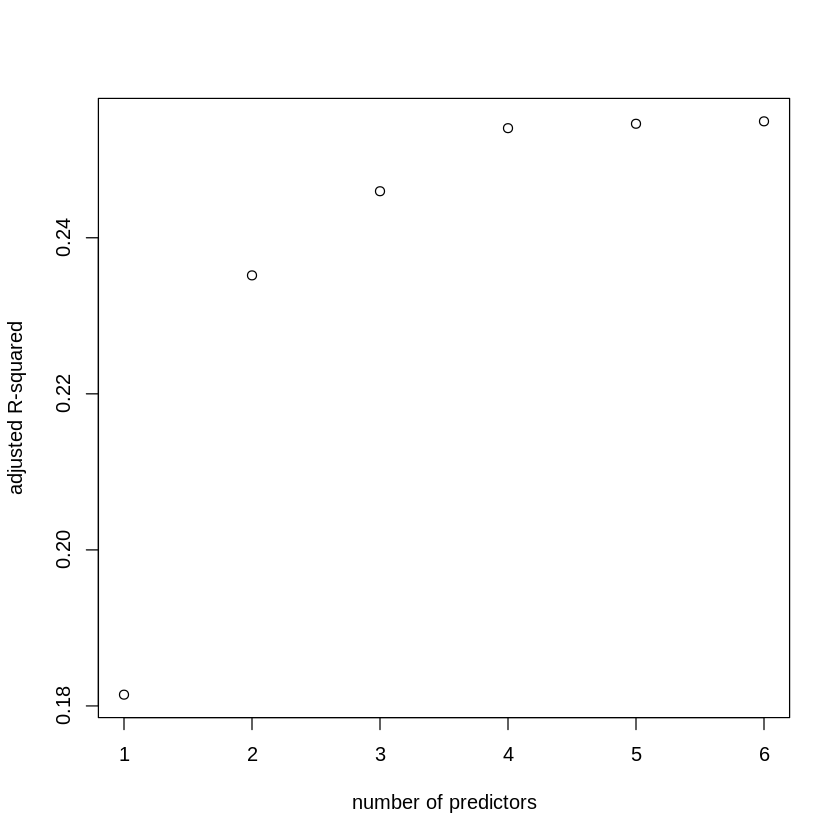

From Adjusted R^2, we can infer that full model is the best model as it has the highest value for adjusted R^2.

**Since, full model is the best model according to AIC, MSPE and adjusted R^2, hence we can conclude that full model is the best model for this dataset.**

## **Conclusion**

In this research, an in-depth analysis of the Household Power Consumption from 2006 to 2010 was conducted, focusing on predicting the voltage at any timestamp. From various analytical methods, we can conclude that although few features might seem insignificant for the regression model, ultimately, the full model is the best model for this dataset.
The features hold some correlation with each other and are significant towards creating a prediction model.

To extend this research, future studies could delve deeper into the impact of correcting the assumptions like heteroscedasticity by applying correction methods like log or square root.
Additionally, incorporating advanced analytics and machine learning techniques could
enhance predictive capabilities, providing a more comprehensive understanding of the intricate
factors influencing the model. Overall, this research contributes to the
evolving field of power consumption and sets the stage for further exploration into the domain of smart grids.
